Promovare
1    250
0    250
Name: count, dtype: int64


Output()

Output()

ERROR:pymc.stats.convergence:There were 31 divergences after tuning. Increase `target_accept` or reparameterize.


Ore_Studiu (β0): 3.743513074497553
Ore_Somn (β1): 5.023092382828323


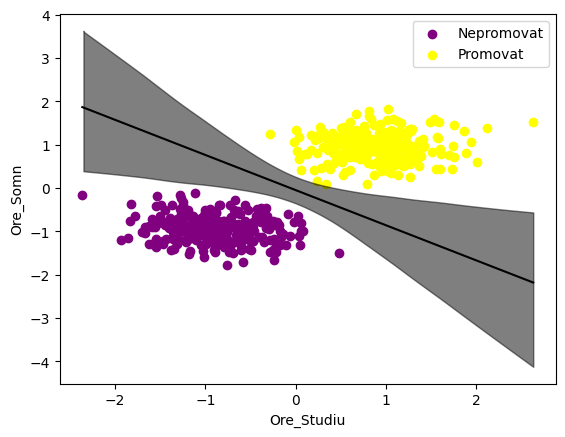

In [15]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

data = pd.read_csv("date_promovare_examen.csv")
y_1 = data["Promovare"].values
x_n = ['Ore_Studiu', 'Ore_Somn']
x_1 = data[x_n].values

# (a)
print(data["Promovare"].value_counts())

x_1_medie = x_1.mean(axis=0)
x_1_std = x_1.std(axis=0)
x_1_n = (x_1 - x_1_medie) / x_1_std

with pm.Model() as model_1:
    α = pm.Normal('α', mu=0, sigma=10)
    β = pm.Normal('β', mu=0, sigma=2, shape=len(x_n))

    μ = α + pm.math.dot(x_1_n, β)
    θ = pm.Deterministic('θ', 1 / (1 + pm.math.exp(-μ)))

    # (b)
    bd = pm.Deterministic('bd', -α/β[1] - β[0]/β[1] * x_1_n[:, 0])

    yl = pm.Bernoulli('yl', p=θ, observed=y_1)
    idata_1 = pm.sample(2000, return_inferencedata=True)

# c
idx = np.argsort(x_1_n[:, 0])
bd = idata_1.posterior['bd'].mean(("chain", "draw"))[idx]

plt.scatter(x_1_n[:, 0][y_1 == 0], x_1_n[:, 1][y_1 == 0], color='purple', label='Nepromovat')
plt.scatter(x_1_n[:, 0][y_1 == 1], x_1_n[:, 1][y_1 == 1], color='yellow', label='Promovat')
plt.legend()
plt.plot(x_1_n[:, 0][idx], bd, color='k')
az.plot_hdi(x_1_n[:, 0], idata_1.posterior['bd'], color='k')
plt.xlabel(x_n[0])
plt.ylabel(x_n[1])

parametri_beta = idata_1.posterior['β'].mean(("chain", "draw"))
print(f"Ore_Studiu (β0): {parametri_beta[0].values}")
print(f"Ore_Somn (β1): {parametri_beta[1].values}")